## Importing necessary libraries

In [1]:
import os 
import re
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm

# Training Data Analysis

## Source Training Articles Analysis

100%|██████████| 293625/293625 [00:09<00:00, 30155.37it/s]


Total training documents :  293625
Average no of words in source train articles :  616
25 % of source training documents(around 73406) have less than 325 words
50 % of source training documents(around 146812) have less than 491 words
75 % of source training documents(around 220218) have less than 735 words


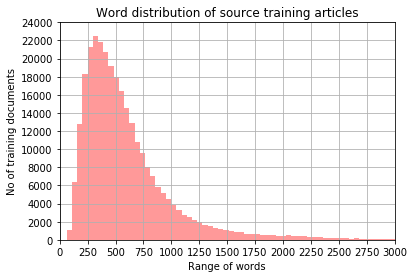

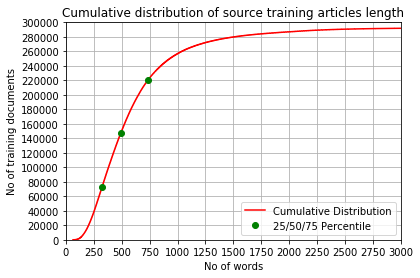

In [2]:
# Reading clean source training data file
with open("clean-src-train.txt",'r') as file:
    src_train_data=file.readlines()
    src_train_data=[re.sub('\n','',i) for i in src_train_data]
    
###############################################################

# Geeting no of words in each document
src_train_word_count=[]
for line in tqdm(src_train_data):
    src_train_word_count.append(len(line.split()))

###############################################################    
    
# Calculating avg no of words
print("Total training documents : ",len(src_train_data))
print("Average no of words in source train articles : ",int(np.sum(src_train_word_count)/len(src_train_word_count)))
# Calculating Percentile statistics
perc=[25,50,75]
perc_src_train_doc=[]
perc_src_train_word=[]
for i in perc:
    a=int((293625*i)/100)
    b=int(np.percentile(src_train_word_count,i))
    perc_src_train_doc.append(a)
    perc_src_train_word.append(b)
    print("{} % of source training documents(around {}) have less than {} words".format(i,a,b))
    
    
    
#################################################################################
    
    
# Word Distribution of source train articles
sns.distplot(src_train_word_count, bins=300,kde=False,color="r")
plt.xlim(0,3000)
plt.xticks(np.arange(0,3001,step=250))
plt.yticks(np.arange(0,25000,step=2000))
plt.title('Word distribution of source training articles')
plt.xlabel("Range of words")
plt.ylabel("No of training documents")
plt.grid()
plt.savefig("src-train-hist.png")
plt.show()


#################################################


x=np.sort(src_train_word_count)
plt.plot(x,np.arange(len(x)),'r',label="Cumulative Distribution")
plt.plot(perc_src_train_word,perc_src_train_doc,'go',label="25/50/75 Percentile")
plt.xlim(0,3000)
plt.ylim(0,300000)
plt.xticks(np.arange(0,3001,step=250))
plt.yticks(np.arange(0,320000,step=20000))
plt.title("Cumulative distribution of source training articles length")
plt.xlabel("No of words")
plt.ylabel("No of training documents")
plt.grid()
plt.legend()
plt.savefig("src-train-cumsum.png")
plt.show()

## Target Training Summary Analysis

100%|██████████| 293625/293625 [00:00<00:00, 654020.08it/s]


Average no of words in source train articles :  22
25 % of target training documents(around 73406) have less than 18 words in summary
50 % of target training documents(around 146812) have less than 22 words in summary
75 % of target training documents(around 220218) have less than 26 words in summary


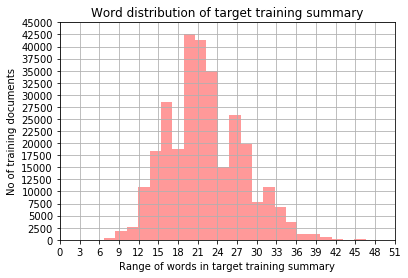

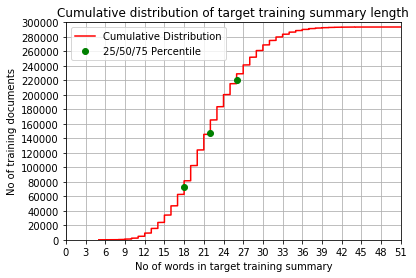

In [2]:
# Reading clean target training summary data file
with open("clean-tgt-train.txt",'r') as file:
    tgt_train_data=file.readlines()
    tgt_train_data=[re.sub('\n','',i) for i in tgt_train_data]
    
###############################################################

# Geeting no of words in each document
tgt_train_word_count=[]
for line in tqdm(tgt_train_data):
    tgt_train_word_count.append(len(line.split()))

###############################################################    
    
# Calculating avg no of words
print("Average no of words in source train articles : ",int(np.sum(tgt_train_word_count)/len(tgt_train_word_count)))
# Calculating Percentile statistics
perc=[25,50,75]
perc_tgt_train_doc=[]
perc_tgt_train_word=[]
for i in perc:
    a=int((293625*i)/100)
    b=int(np.percentile(tgt_train_word_count,i))
    perc_tgt_train_doc.append(a)
    perc_tgt_train_word.append(b)
    print("{} % of target training documents(around {}) have less than {} words in summary".format(i,a,b))

    
###################################################################

# Word Distribution of source train articles
sns.distplot(tgt_train_word_count, bins=30,kde=False,color="r")
plt.xlim(0,51)
plt.ylim(0,44000)
plt.xticks(np.arange(0,52,3))
plt.yticks(np.arange(0,46000,step=2500))
plt.title('Word distribution of target training summary')
plt.xlabel("Range of words in target training summary")
plt.ylabel("No of training documents")
plt.grid()
plt.savefig("tgt-train-hist.png")
plt.show()


#################################################


x=np.sort(tgt_train_word_count)
plt.plot(x,np.arange(len(x)),'r',label="Cumulative Distribution")
plt.plot(perc_tgt_train_word,perc_tgt_train_doc,'go',label="25/50/75 Percentile")
plt.xlim(0,51)
plt.ylim(0,300000)
plt.xticks(np.arange(0,52,3))
plt.yticks(np.arange(0,320000,step=20000))
plt.title("Cumulative distribution of target training summary length")
plt.xlabel("No of words in target training summary")
plt.ylabel("No of training documents")
plt.grid()
plt.legend()
plt.savefig("tgt-train-cumsum.png")
plt.show()

## Training Image Analysis

An article has avg 6 images related to it
There are total 1876934 training images
25 % of training documents(around 73406) have less than 3 related images
50 % of training documents(around 146812) have less than 5 related images
75 % of training documents(around 220218) have less than 8 related images


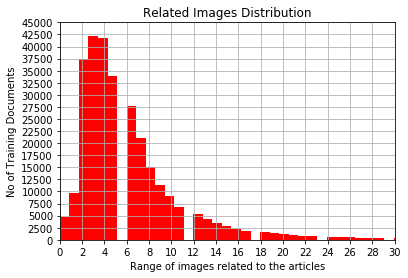

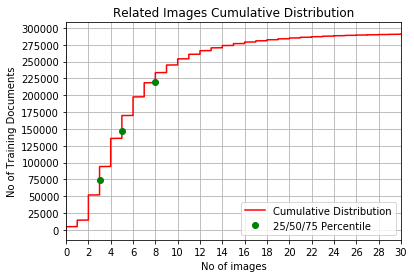

In [4]:
# Reading training articles file names
with open("train_doc_name.txt",'r') as file:
    train_doc=file.readlines()
    train_doc=[i[0:40] for i in train_doc]
    
##############################################

# Getting all training image file names
train_images=[]
dr=os.listdir("/media/vikrant/Machine Learning/1. MSMO Data Complete")
dr=[i for i in dr if "data" in i and len(i) <=6]
for fold in dr:
    train_images.extend(os.listdir("/media/vikrant/Machine Learning/1. MSMO Data Complete/"+fold+"/img")) 
t_i=[i[0:40] for i in train_images]    

###############################################

from collections import Counter
train_cnt=Counter(t_i)    
# cnt is a dictionary where key is article file name and value is no of related images to 
# the article
train_images_count=[]
for doc in train_doc:
    if doc in train_cnt:
        train_images_count.append(train_cnt[doc])
    else:
        train_images_count.append(0)
        
print("An article has avg {} images related to it".format(int(np.sum(train_images_count)/len(train_images_count))))
print("There are total {} training images".format(np.sum(train_images_count)))

################################################

# Calculating Percentile statistics
perc=[25,50,75]
perc_train_doc=[]
perc_train_img=[]
for i in perc:
    a=int((293625*i)/100)
    b=int(np.percentile(train_images_count,i))
    perc_train_doc.append(a)
    perc_train_img.append(b)
    print("{} % of training documents(around {}) have less than {} related images".format(i,a,b))

    
#######################################################################

plt.hist(train_images_count,bins=275,color='r')
plt.xlim(0,30)
plt.xticks(np.arange(0, 31, step=2))
plt.yticks(np.arange(0, 46500, step=2500))
plt.title("Related Images Distribution")
plt.xlabel("Range of images related to the articles")
plt.ylabel("No of Training Documents")
plt.grid()
plt.savefig("train-img-hist.png")
plt.show()


###########################################################


plt.plot(np.sort(train_images_count),np.arange(len(train_images_count)),color='r',\
         label="Cumulative Distribution")
plt.plot(perc_train_img,perc_train_doc,'go',label='25/50/75 Percentile')
plt.xlim(0,30)
plt.xticks(np.arange(0, 31, step=2))
plt.yticks(np.arange(0,315000, step=25000))
plt.title("Related Images Cumulative Distribution")
plt.xlabel("No of images")
plt.ylabel("No of Training Documents")
plt.grid()
plt.legend()
plt.savefig("train-img-cumsum.png")
plt.show()


# Validation Data Analysis

## Source validation data analysis

100%|██████████| 10339/10339 [00:00<00:00, 30378.96it/s]


Total Validation Documents :  10339
Average no of words in source validation articles :  657
25 % of source validation documents(around 2584) have less than 346 words
50 % of source validation documents(around 5169) have less than 513 words
75 % of source validation documents(around 7754) have less than 757 words


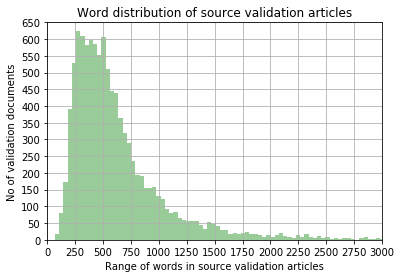

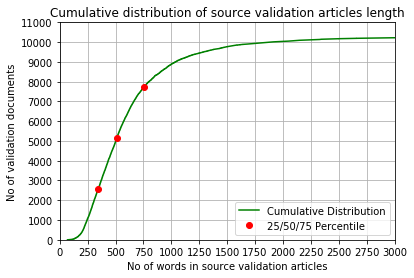

In [2]:
# Reading clean source validation data file
with open("clean-src-val.txt",'r') as file:
    src_val_data=file.readlines()
    src_val_data=[re.sub('\n','',i) for i in src_val_data]
    
###############################################################

# Geeting no of words in each document
src_val_word_count=[]
for line in tqdm(src_val_data):
    src_val_word_count.append(len(line.split()))

###############################################################    
print("Total Validation Documents : ",len(src_val_data))
# Calculating avg no of words
print("Average no of words in source validation articles : ",int(np.sum(src_val_word_count)/len(src_val_word_count)))
# Calculating Percentile statistics
perc=[25,50,75]
perc_src_val_doc=[]
perc_src_val_word=[]
for i in perc:
    a=int((10339*i)/100)
    b=int(np.percentile(src_val_word_count,i))
    perc_src_val_doc.append(a)
    perc_src_val_word.append(b)
    print("{} % of source validation documents(around {}) have less than {} words".format(i,a,b))

###############################################################################

# Word Distribution of source val articles
sns.distplot(src_val_word_count, bins=300,kde=False,color="g")
plt.xlim(0,3000)
plt.ylim(0,650)
plt.xticks(np.arange(0,3001,step=250))
plt.yticks(np.arange(0,651,step=50))
plt.title('Word distribution of source validation articles')
plt.xlabel("Range of words in source validation articles")
plt.ylabel("No of validation documents")
plt.grid()
plt.savefig("src-val-hist.png")
plt.show()


#################################################


x=np.sort(src_val_word_count)
plt.plot(x,np.arange(len(x)),'g',label="Cumulative Distribution")
plt.plot(perc_src_val_word,perc_src_val_doc,'ro',label="25/50/75 Percentile")
plt.xlim(0,3000)
plt.ylim(0,11000)
plt.xticks(np.arange(0,3001,step=250))
plt.yticks(np.arange(0,11001,step=1000))
plt.title("Cumulative distribution of source validation articles length")
plt.xlabel("No of words in source validation articles")
plt.ylabel("No of validation documents")
plt.grid()
plt.legend()
plt.savefig("src-val-cumsum.png")
plt.show()

## Target Validation Summary Analysis

100%|██████████| 10339/10339 [00:00<00:00, 408286.34it/s]


Average no of words in target validation articles summary :  22
25 % of target validation documents(around 2584) have less than 19 words in summary
50 % of target validation documents(around 5169) have less than 22 words in summary
75 % of target validation documents(around 7754) have less than 26 words in summary


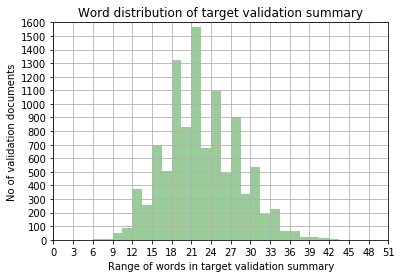

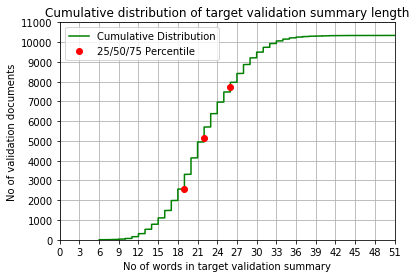

In [2]:
# Reading clean target validation data file
with open("clean-tgt-val.txt",'r') as file:
    tgt_val_data=file.readlines()
    tgt_val_data=[re.sub('\n','',i) for i in tgt_val_data]
    
###############################################################

# Geeting no of words in each document
tgt_val_word_count=[]
for line in tqdm(tgt_val_data):
    tgt_val_word_count.append(len(line.split()))

###############################################################    
    
# Calculating avg no of words
print("Average no of words in target validation articles summary : ",int(np.sum(tgt_val_word_count)/len(tgt_val_word_count)))
# Calculating Percentile statistics
perc=[25,50,75]
perc_tgt_val_doc=[]
perc_tgt_val_word=[]
for i in perc:
    a=int((10339*i)/100)
    b=int(np.percentile(tgt_val_word_count,i))
    perc_tgt_val_doc.append(a)
    perc_tgt_val_word.append(b)
    print("{} % of target validation documents(around {}) have less than {} words in summary".format(i,a,b))

    
###################################################################

# Word Distribution of source train articles
sns.distplot(tgt_val_word_count, bins=30,kde=False,color="g")
plt.xlim(0,51)
plt.ylim(0,1600)
plt.xticks(np.arange(0,52,3))
plt.yticks(np.arange(0,1601,step=100))
plt.title('Word distribution of target validation summary')
plt.xlabel("Range of words in target validation summary")
plt.ylabel("No of validation documents")
plt.grid()
plt.savefig("tgt-val-hist.png")
plt.show()


#################################################


x=np.sort(tgt_val_word_count)
plt.plot(x,np.arange(len(x)),'g',label="Cumulative Distribution")
plt.plot(perc_tgt_val_word,perc_tgt_val_doc,'ro',label="25/50/75 Percentile")
plt.xlim(0,51)
plt.ylim(0,10339)
plt.xticks(np.arange(0,52,3))
plt.yticks(np.arange(0,11340,step=1000))
plt.title("Cumulative distribution of target validation summary length")
plt.xlabel("No of words in target validation summary")
plt.ylabel("No of validation documents")
plt.grid()
plt.legend()
plt.savefig("tgt-val-cumsum.png")
plt.show()

## Validation Data Image Analysis

In [2]:
# Reading training articles file names
with open("val_doc_name.txt",'r') as file:
    val_doc=file.readlines()
    val_doc=[i[0:40] for i in val_doc]
    
##############################################

# Getting all training image file names
val_images=[]
val_images = os.listdir("/media/vikrant/Machine Learning/1. MSMO Data Complete/valid_d/img")
t_i=[i[0:40] for i in val_images]    

###############################################

from collections import Counter
val_cnt=Counter(t_i)    
# val_cnt is a dictionary where key is article file name and value is no of related images to 
# the article
val_images_count=[]
for doc in val_doc:
    if doc in val_cnt:
        val_images_count.append(val_cnt[doc])
    else:
        val_images_count.append(0)
        
print("A validation article has avg {} images related to it".format(int(np.sum(val_images_count)/len(val_images_count))))
print("There are total {} validation images".format(np.sum(val_images_count)))
###############################################
# Calculating Percentile statistics
perc=[25,50,75]
perc_val_doc=[]
perc_val_img=[]
for i in perc:
    a=int((10339*i)/100)
    b=int(np.percentile(val_images_count,i))
    perc_val_doc.append(a)
    perc_val_img.append(b)
    print("{} % of validation documents(around {}) have less than {} related images".format(i,a,b))



A validation article has avg 6 images related to it
There are total 71463 validation images
25 % of validation documents(around 2584) have less than 3 related images
50 % of validation documents(around 5169) have less than 5 related images
75 % of validation documents(around 7754) have less than 8 related images


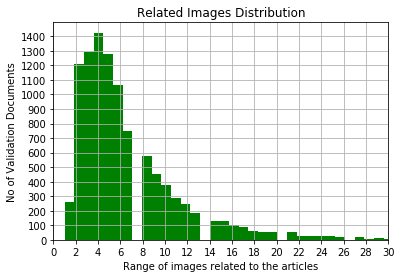

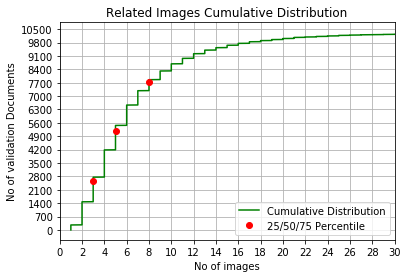

In [3]:
plt.hist(val_images_count,bins=150,color='g')
plt.xlim(0,30)
plt.xticks(np.arange(0, 31, step=2))
plt.yticks(np.arange(0, 1500, step=100))
plt.title("Related Images Distribution")
plt.xlabel("Range of images related to the articles")
plt.ylabel("No of Validation Documents")
plt.grid()
plt.savefig("val-img-hist.png")
plt.show()


###########################################################


plt.plot(np.sort(val_images_count),np.arange(len(val_images_count)),color='g',\
         label="Cumulative Distribution")
plt.plot(perc_val_img,perc_val_doc,'ro',label='25/50/75 Percentile')
plt.xlim(0,30)
plt.xticks(np.arange(0, 31, step=2))
plt.yticks(np.arange(0,11001, step=700))
plt.title("Related Images Cumulative Distribution")
plt.xlabel("No of images")
plt.ylabel("No of validation Documents")
plt.grid()
plt.legend()
plt.savefig("val-img-cumsum.png")
plt.show()

# Test Data Analysis

## Source test data analysis

100%|██████████| 10245/10245 [00:00<00:00, 34341.73it/s]


Average no of words in source test articles :  625
25 % of source test documents(around 2561) have less than 322 words
50 % of source test documents(around 5122) have less than 485 words
75 % of source test documents(around 7683) have less than 735 words


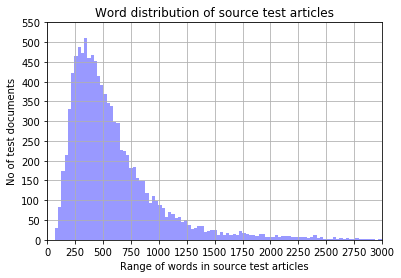

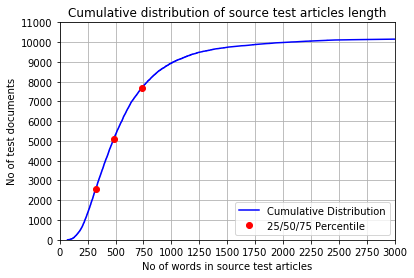

In [2]:
# Reading clean source test data file
with open("clean-src-test.txt",'r') as file:
    src_test_data=file.readlines()
    src_test_data=[re.sub('\n','',i) for i in src_test_data]
    
###############################################################

# Geeting no of words in each document
src_test_word_count=[]
for line in tqdm(src_test_data):
    src_test_word_count.append(len(line.split()))

###############################################################    
    
# Calculating avg no of words
print("Average no of words in source test articles : ",int(np.sum(src_test_word_count)/len(src_test_word_count)))
# Calculating Percentile statistics
perc=[25,50,75]
perc_src_test_doc=[]
perc_src_test_word=[]
for i in perc:
    a=int((10245*i)/100)
    b=int(np.percentile(src_test_word_count,i))
    perc_src_test_doc.append(a)
    perc_src_test_word.append(b)
    print("{} % of source test documents(around {}) have less than {} words".format(i,a,b))

###############################################################################

# Word Distribution of source val articles
sns.distplot(src_test_word_count, bins=300,kde=False,color="b")
plt.xlim(0,3000)
plt.ylim(0,550)
plt.xticks(np.arange(0,3001,step=250))
plt.yticks(np.arange(0,551,step=50))
plt.title('Word distribution of source test articles')
plt.xlabel("Range of words in source test articles")
plt.ylabel("No of test documents")
plt.grid()
plt.savefig("src-test-hist.png")
plt.show()


#################################################


x=np.sort(src_test_word_count)
plt.plot(x,np.arange(len(x)),'b',label="Cumulative Distribution")
plt.plot(perc_src_test_word,perc_src_test_doc,'ro',label="25/50/75 Percentile")
plt.xlim(0,3000)
plt.ylim(0,11000)
plt.xticks(np.arange(0,3001,step=250))
plt.yticks(np.arange(0,11001,step=1000))
plt.title("Cumulative distribution of source test articles length")
plt.xlabel("No of words in source test articles")
plt.ylabel("No of test documents")
plt.grid()
plt.legend()
plt.savefig("src-test-cumsum.png")
plt.show()

## Target test summary analysis

100%|██████████| 10245/10245 [00:00<00:00, 505412.13it/s]


Average no of words in target test articles summary :  23
25 % of target test documents(around 2561) have less than 19 words in summary
50 % of target test documents(around 5122) have less than 23 words in summary
75 % of target test documents(around 7683) have less than 27 words in summary


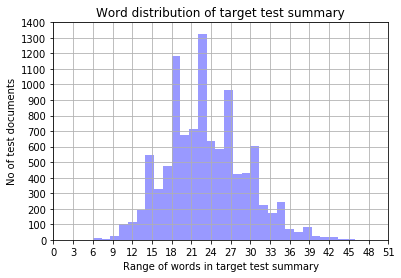

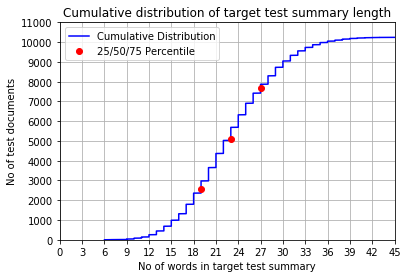

In [3]:
# Reading clean target validation data file
with open("clean-tgt-test.txt",'r') as file:
    tgt_test_data=file.readlines()
    tgt_test_data=[re.sub('\n','',i) for i in tgt_test_data]
    
###############################################################

# Geeting no of words in each document
tgt_test_word_count=[]
for line in tqdm(tgt_test_data):
    tgt_test_word_count.append(len(line.split()))

###############################################################    
    
# Calculating avg no of words
print("Average no of words in target test articles summary : ",int(np.sum(tgt_test_word_count)/len(tgt_test_word_count)))
# Calculating Percentile statistics
perc=[25,50,75]
perc_tgt_test_doc=[]
perc_tgt_test_word=[]
for i in perc:
    a=int((10245*i)/100)
    b=int(np.percentile(tgt_test_word_count,i))
    perc_tgt_test_doc.append(a)
    perc_tgt_test_word.append(b)
    print("{} % of target test documents(around {}) have less than {} words in summary".format(i,a,b))

    
###################################################################

# Word Distribution of source train articles
sns.distplot(tgt_test_word_count, bins=30,kde=False,color="b")
plt.xlim(0,51)
plt.ylim(0,1400)
plt.xticks(np.arange(0,52,3))
plt.yticks(np.arange(0,1401,step=100))
plt.title('Word distribution of target test summary')
plt.xlabel("Range of words in target test summary")
plt.ylabel("No of test documents")
plt.grid()
plt.savefig("tgt-test-hist.png")
plt.show()


#################################################


x=np.sort(tgt_test_word_count)
plt.plot(x,np.arange(len(x)),'b',label="Cumulative Distribution")
plt.plot(perc_tgt_test_word,perc_tgt_test_doc,'ro',label="25/50/75 Percentile")
plt.xlim(0,45)
plt.ylim(0,10339)
plt.xticks(np.arange(0,46,3))
plt.yticks(np.arange(0,11340,step=1000))
plt.title("Cumulative distribution of target test summary length")
plt.xlabel("No of words in target test summary")
plt.ylabel("No of test documents")
plt.grid()
plt.legend()
plt.savefig("tgt-test-cumsum.png")
plt.show()

## Test image Analysis

In [4]:
# Reading test articles file names
with open("test_doc_name.txt",'r') as file:
    test_doc=file.readlines()
    test_doc=[i[0:40] for i in test_doc]
    
##############################################

# Getting all training image file names
test_images=[]
test_images = os.listdir("/media/vikrant/Machine Learning/1. MSMO Data Complete/test_d/img")
t_i=[i[0:40] for i in test_images]    

###############################################

from collections import Counter
test_cnt=Counter(t_i)    
# test_cnt is a dictionary where key is article file name and value is no of related images to 
# the article
test_images_count=[]
for doc in test_doc:
    if doc in test_cnt:
        test_images_count.append(test_cnt[doc])
    else:
        test_images_count.append(0)
        
print("A test article has avg {} images related to it".format(int(np.sum(test_images_count)/len(test_images_count))))
print("There are total {} test images".format(np.sum(test_images_count)))
###############################################
# Calculating Percentile statistics
perc=[25,50,75]
perc_test_doc=[]
perc_test_img=[]
for i in perc:
    a=int((10245*i)/100)
    b=int(np.percentile(test_images_count,i))
    perc_test_doc.append(a)
    perc_test_img.append(b)
    print("{} % of test documents(around {}) have less than {} related images".format(i,a,b))



A test article has avg 6 images related to it
There are total 68414 test images
25 % of test documents(around 2561) have less than 3 related images
50 % of test documents(around 5122) have less than 5 related images
75 % of test documents(around 7683) have less than 8 related images


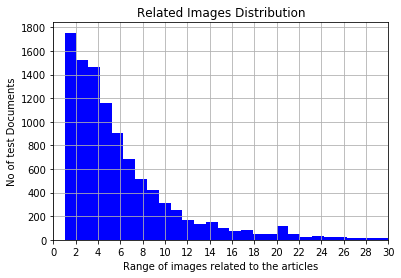

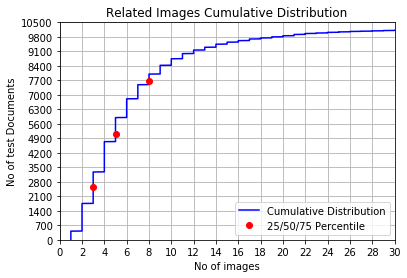

In [5]:
plt.hist(test_images_count,bins=200,color='b')
plt.xlim(0,30)
plt.xticks(np.arange(0, 31, step=2))
plt.yticks(np.arange(0, 1801, step=200))
plt.title("Related Images Distribution")
plt.xlabel("Range of images related to the articles")
plt.ylabel("No of test Documents")
plt.grid()
plt.savefig("test-img-hist.png")
plt.show()


###########################################################


plt.plot(np.sort(test_images_count),np.arange(len(test_images_count)),color='b',\
         label="Cumulative Distribution")
plt.plot(perc_test_img,perc_test_doc,'ro',label='25/50/75 Percentile')
plt.xlim(0,30)
plt.ylim(0,10500)
plt.xticks(np.arange(0, 31, step=2))
plt.yticks(np.arange(0,10501, step=700))
plt.title("Related Images Cumulative Distribution")
plt.xlabel("No of images")
plt.ylabel("No of test Documents")
plt.grid()
plt.legend()
plt.savefig("test-img-cumsum.png")
plt.show()

# Vocabulary Analysis

## Source Vocabulary Analysis

### Most Frequent words

Top 15 most frequent words in Source Vocabulary

the  :  1880913
a  :  934870
to  :  844930
of  :  730819
in  :  690511
and  :  645903
on  :  357208
for  :  339301
was  :  308217
is  :  276016
his  :  261514
with  :  256736
at  :  230824
he  :  220607
that  :  217534


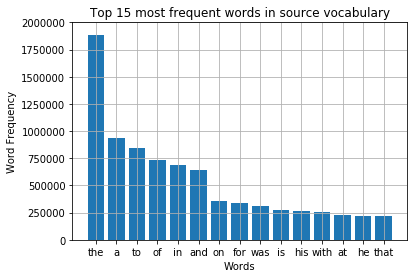

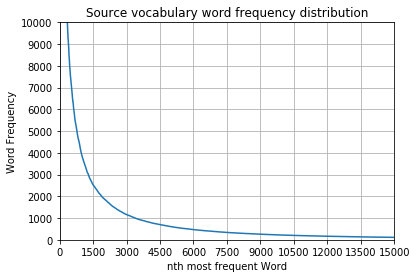

In [3]:
from collections import Counter
with open("t-src-train.txt") as file:
    t_src=file.readlines()
    t_src=[re.sub('\n','',i) for i in t_src]
src_words_list=[]
for line in t_src:
    src_words_list.extend(line.split())
src_vocab=Counter(src_words_list)
sorted_src_vocab=sorted(src_vocab.items(), key = lambda kv:(kv[1], kv[0]),reverse=True)

########################################################################################

print("Top 15 most frequent words in Source Vocabulary\n")
src_word=[]
src_freq=[]
for i in range(len(sorted_src_vocab)):
    if i <15:
        print(sorted_src_vocab[i][0],' : ',sorted_src_vocab[i][1])
    src_word.append(sorted_src_vocab[i][0])
    src_freq.append(sorted_src_vocab[i][1])

###########################################################

plt.bar(src_word[0:15],src_freq[0:15])
plt.ylim(0,2000000)
plt.title("Top 15 most frequent words in source vocabulary")
plt.xlabel("Words")
plt.ylabel("Word Frequency")
plt.grid()
plt.savefig("src-vocab-top.png")
plt.show()

###########################################################

plt.plot(np.arange(1,len(src_word)+1),src_freq)
plt.xlim(0,15000)
plt.ylim(0,10000)
plt.xticks(np.arange(0,15001,1500))
plt.yticks(np.arange(0,10001,1000))
plt.title("Source vocabulary word frequency distribution")
plt.xlabel("nth most frequent Word")
plt.ylabel("Word Frequency")
plt.grid()
plt.savefig("src-vocab-cumsum.png")
plt.show()

### Creating wordcloud

100%|██████████| 293625/293625 [00:00<00:00, 450958.07it/s]


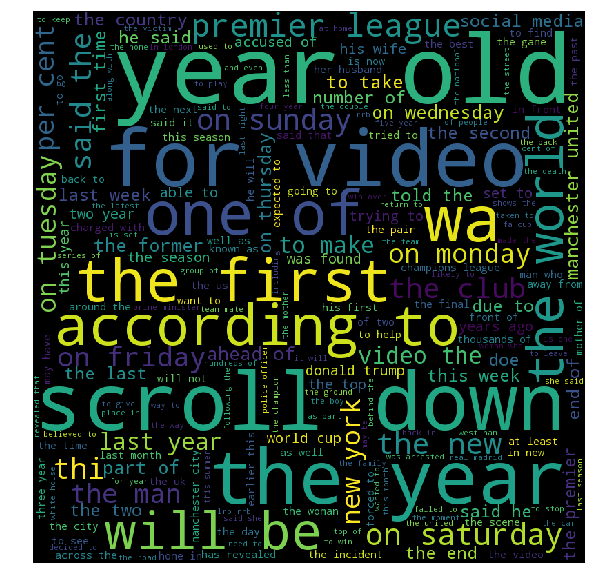

In [4]:
full_str=''
for line in tqdm(t_src):
    full_str+=line+' '
from wordcloud import WordCloud
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='black', 
                min_font_size = 1).generate(full_str) 
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
plt.savefig("src-vocab-wc.png")
plt.show()

# Target Vocabulary Analysis

### Word frequency

Top 15 most frequent words in Target Vocabulary

the  :  168014
to  :  167665
a  :  127425
in  :  114906
of  :  114511
and  :  108159
for  :  73642
is  :  65578
as  :  64274
after  :  60977
on  :  55228
with  :  53624
his  :  46517
her  :  39726
at  :  37735


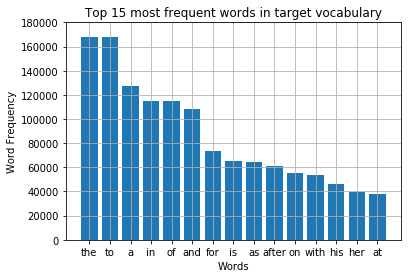

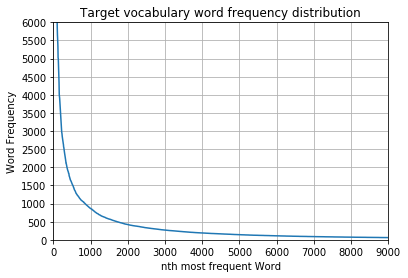

In [2]:
from collections import Counter
with open("t-tgt-train.txt") as file:
    t_tgt=file.readlines()
    t_tgt=[re.sub('\n','',i) for i in t_tgt]
tgt_words_list=[]
for line in t_tgt:
    tgt_words_list.extend(line.split())
tgt_vocab=Counter(tgt_words_list)
sorted_tgt_vocab=sorted(tgt_vocab.items(), key = lambda kv:(kv[1], kv[0]),reverse=True)

########################################################################################

print("Top 15 most frequent words in Target Vocabulary\n")
tgt_word=[]
tgt_freq=[]
for i in range(len(sorted_tgt_vocab)):
    if i <15:
        print(sorted_tgt_vocab[i][0],' : ',sorted_tgt_vocab[i][1])
    tgt_word.append(sorted_tgt_vocab[i][0])
    tgt_freq.append(sorted_tgt_vocab[i][1])

###########################################################

plt.bar(tgt_word[0:15],tgt_freq[0:15])
plt.ylim(0,180000)
plt.title("Top 15 most frequent words in target vocabulary")
plt.xlabel("Words")
plt.ylabel("Word Frequency")
plt.grid()
plt.savefig("tgt-vocab-top.png")
plt.show()

###########################################################

plt.plot(np.arange(1,len(tgt_word)+1),tgt_freq)
plt.xlim(0,9000)
plt.ylim(0,6000)
plt.xticks(np.arange(0,9001,1000))
plt.yticks(np.arange(0,6001,500))
plt.title("Target vocabulary word frequency distribution")
plt.xlabel("nth most frequent Word")
plt.ylabel("Word Frequency")
plt.grid()
plt.savefig("tgt-vocab-cumsum.png")
plt.show()

### Creating wordcloud

100%|██████████| 293625/293625 [00:00<00:00, 1487175.71it/s]


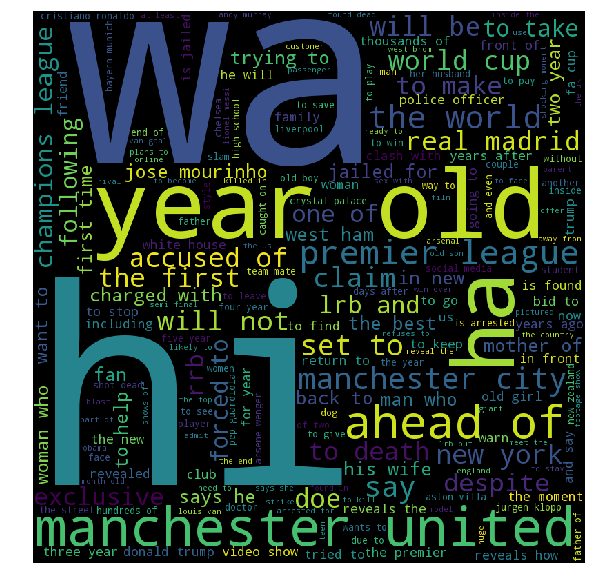

In [3]:
full_str=''
for line in tqdm(t_tgt):
    full_str+=line+' '
from wordcloud import WordCloud
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='black', 
                min_font_size = 1).generate(full_str) 
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
plt.savefig("tgt-vocab-wc.png")
plt.show()

### Correlation b/w source article length and target summary

In [2]:
with open("clean-src-train.txt",'r') as file:
    src_data=file.readlines()
    src_data=[re.sub('\n','',i) for i in src_data]
src_word_count=[]
for line in tqdm(src_data):
    src_word_count.append(len(line.split()))

##############################################################    
    
with open("clean-tgt-train.txt",'r') as file:
    tgt_data=file.readlines()
    tgt_data=[re.sub('\n','',i) for i in tgt_data]
tgt_word_count=[]
for line in tqdm(tgt_data):
    tgt_word_count.append(len(line.split()))

100%|██████████| 293625/293625 [00:01<00:00, 287416.06it/s]


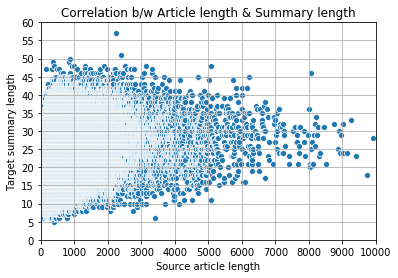

In [6]:
df=pd.DataFrame(src_word_count,columns=["SRC"])
df["TGT"]=tgt_word_count
df=df.sort_values("SRC")
sns.scatterplot(x="SRC",y="TGT",data=df)
plt.xlim(0,10000)
plt.ylim(0,60)
plt.xticks(np.arange(0,10001,1000))
plt.yticks(np.arange(0,61,5))
plt.title("Correlation b/w Article length & Summary length")
plt.xlabel("Source article length")
plt.ylabel("Target summary length")
plt.grid()
plt.savefig("Correlation-src-tgt-len.png")
plt.show()

In [7]:
with open("train_doc_name.txt",'r') as file:
    train_doc=file.readlines()
    train_doc=[i[0:40] for i in train_doc]
    
##############################################

# Getting all training image file names
train_images=[]
dr=os.listdir("/media/vikrant/Machine Learning/1. MSMO Data Complete")
dr=[i for i in dr if "data" in i and len(i) <=6]
for fold in dr:
    train_images.extend(os.listdir("/media/vikrant/Machine Learning/1. MSMO Data Complete/"+fold+"/img")) 
t_i=[i[0:40] for i in train_images]    

###############################################

from collections import Counter
train_cnt=Counter(t_i)    
# cnt is a dictionary where key is article file name and value is no of related images to 
# the article
train_images_count=[]
for doc in train_doc:
    if doc in train_cnt:
        train_images_count.append(train_cnt[doc])
    else:
        train_images_count.append(0)
        
print("An article has avg {} images related to it".format(int(np.sum(train_images_count)/len(train_images_count))))
print("There are total {} training images".format(np.sum(train_images_count)))



An article has avg 6 images related to it
There are total 1876934 training images


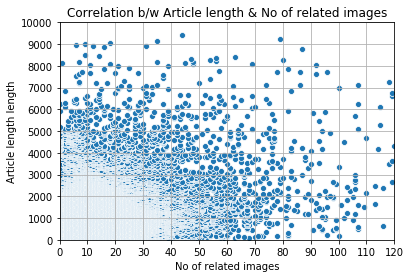

In [19]:
df1=pd.DataFrame(src_word_count,columns=["SRC"])
df1["TGT"]=train_images_count
df1=df1.sort_values("SRC")
sns.scatterplot(y="SRC",x="TGT",data=df1)
plt.ylim(0,10000)
plt.xlim(0,120)
plt.yticks(np.arange(0,10001,1000))
plt.xticks(np.arange(0,121,10))
plt.title("Correlation b/w Article length & No of related images")
plt.xlabel("No of related images")
plt.ylabel("Article length length")
plt.grid()
plt.savefig("Correlation-img.png")
plt.show()